# NLP - Sarcasm Classifier

Requires the sarcasm.json data file to be placed in the same folder as this notebook.

## Import Modules

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Set Parameters

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


## Create Lists from JSON File

In [3]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Tokenize Text, Create Sequences and Pad/Truncate

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Create Model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

W0805 15:42:15.447925 13784 deprecation.py:506] From C:\Users\rober\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 15:42:15.455904 13784 deprecation.py:506] From C:\Users\rober\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0805 15:42:15.519732 13784 deprecation.py:323] From C:\Users\rober\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (fro

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


## Train/Fit Model

In [8]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 1s - loss: 0.6684 - acc: 0.5838 - val_loss: 0.5983 - val_acc: 0.7505
Epoch 2/30
20000/20000 - 1s - loss: 0.4784 - acc: 0.7799 - val_loss: 0.4433 - val_acc: 0.7869
Epoch 3/30
20000/20000 - 1s - loss: 0.3976 - acc: 0.8185 - val_loss: 0.4102 - val_acc: 0.8095
Epoch 4/30
20000/20000 - 1s - loss: 0.3778 - acc: 0.8278 - val_loss: 0.4015 - val_acc: 0.8150
Epoch 5/30
20000/20000 - 1s - loss: 0.3690 - acc: 0.8328 - val_loss: 0.4000 - val_acc: 0.8153
Epoch 6/30
20000/20000 - 1s - loss: 0.3618 - acc: 0.8338 - val_loss: 0.3996 - val_acc: 0.8173
Epoch 7/30
20000/20000 - 1s - loss: 0.3582 - acc: 0.8365 - val_loss: 0.4159 - val_acc: 0.8028
Epoch 8/30
20000/20000 - 1s - loss: 0.3566 - acc: 0.8399 - val_loss: 0.4018 - val_acc: 0.8155
Epoch 9/30
20000/20000 - 1s - loss: 0.3538 - acc: 0.8386 - val_loss: 0.4016 - val_acc: 0.8132
Epoch 10/30
20000/20000 - 1s - loss: 0.3543 - acc: 0.8388 - val_loss: 0.4025 - val_acc: 0.8114
Epoch 11/3

## Learning Plots

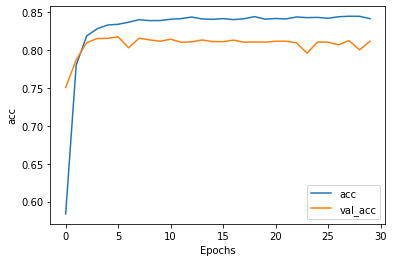

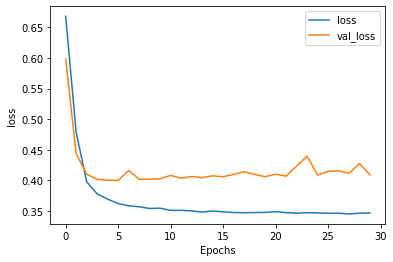

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")